# Aprendizaje Formal

## Práctica 5: Evaluación de modelos - Bias y varianza

### Índice de la práctica

- [Lectura de datos](#Lectura-de-datos)
- [Visualización de datos](#Visualización-de-datos)
- [Regresión lineal - Curva de aprendizaje](#Regresión-lineal---Curva-de-aprendizaje)
- [Regresión polinomial - Curva de aprendizaje](#Regresión-polinomial---Curva-de-aprendizaje)
- [Seleccionando el valor de lambda usando el conjunto de validación](#Seleccionando-el-valor-de-lambda-usando-el-conjunto-de-validación)
- [Particionamiento de los datos en particiones de train/val/test](#Particionamiento-de-los-datos-en-particiones-de-train/val/test)
- [Pipelines de Python](#Pipelines-de-Python)

Importamos todas las librerías que vamos a utilizar durante la segunda práctica.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from test_helper import Test

from scipy.optimize import minimize

%matplotlib inline  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline  

En esta práctica vamos a utilizar la regresión lineal regularizada para estudiar los conceptos de bias y varianza.

## Lectura de datos

En primer lugar vamos a leer los datos. Los datos son datos históricos del cambio en el nivel del agua ($x$) y la cantidad de agua que atraviesa la presa ($y$) en base a dichos cambios.

El conjunto de datos está dividido en tres partes:
* Conjunto de train para entrenar el modelo de regresión: fichero `datosAgua_train.txt`
* Conjunto de validación para buscar el mejor valor de regularización: fichero `datosAgua_val.txt`
* Conjunto de test para evaluar el rendimiento de la regresión obtenida sobre ejemplos no utilizados en el entrenamiento: fichero `datosAgua_test.txt`

Utiliza la función `np.loadtxt` para leer los tres ficheros delimitados por comas.

In [10]:
# Cargar fichero de datos en las variable train, val y test
train = np.loadtxt('datosAgua_train.txt', delimiter=',')
val = np.loadtxt('datosAgua_val.txt', delimiter=',')
test = np.loadtxt('datosAgua_test.txt', delimiter=',')

Como los datos leídos contienen tanto los valores de las variables predictivas ($x$) como las de las variables a predecir ($y$), vamos a separar ambas en las variables correspondientes (`Xtrain, ytrain, Xval, yval, Xtest, ytest`).

In [11]:
# Crea las variables Xtrain, ytrain, Xtest, ytest, Xval, e yval

Xtrain = train[:, :-1]
ytrain = train[:, -1].reshape(-1, 1)

Xval = val[:, :-1] 
yval = val[:, -1].reshape(-1, 1)

Xtest = test[:, :-1]
ytest = test[:, -1].reshape(-1, 1)

Obtén ahora el número de ejemplos que tenemos en cada conjunto.

In [12]:
# Número de ejemplos, almacenar en mtrain, mval y mtest
mtrain, mval, mtest = len(train), len(val), len(test)
print(mtrain, mval, mtest)

12 21 21


## Visualización de datos
Ahora debes mostrar una gráfica con los datos de entrenamiento leídos.
Para ello, utiliza la función [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) de matplotlib. La figura que debes obtener debe ser la siguiente:
![Figura a obtener](img1.png)

(0, 40)

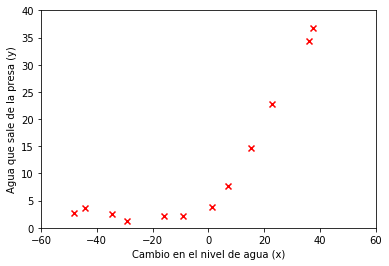

In [13]:
# Dibujar datos

plt.scatter(Xtrain, ytrain, c='r', marker='x')
plt.xlabel("Cambio en el nivel de agua (x)")
plt.ylabel("Agua que sale de la presa (y)")

plt.xlim(xmin=-60, xmax=60)
plt.ylim(ymin=0, ymax=40)

Ahora reutiliza el código de la figura anterior para mostrar en la misma gráfica los ejemplos de entrenamiento (en rojo), validación (en azul) y test (en verde). Incluye una leyenda que indique de a qué conjunto pertenece cada punto.

(-5, 40)

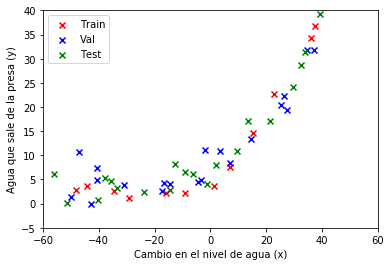

In [14]:
plt.scatter(Xtrain, ytrain, label="Train", c='r', marker='x')
plt.scatter(Xval, yval, label="Val", c='b', marker='x')
plt.scatter(Xtest, ytest, label="Test", c='g', marker='x')

plt.xlabel("Cambio en el nivel de agua (x)")
plt.ylabel("Agua que sale de la presa (y)")
plt.legend()

plt.xlim(xmin=-60, xmax=60)
plt.ylim(ymin=-5, ymax=40)

## Regresión lineal - Curva de aprendizaje
Vamos a comenzar a trabajar con la regresión lineal. Para ello, vamos a hacer uso del paquete LinearRegression de scikit-learn ([Link a LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)).

En el caso de la regresión lineal de scikit, hablamos de la regresión lineal SIN regularización (la versión con regularización se llama Ridge() y la utilizaremos más adelante. ([Link a RidgeRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)).

In [15]:
from sklearn.linear_model import LinearRegression

# Vamos a comprobar como funciona la regresión lineal en este problema

# Crea el objeto LinearRegression
regr = LinearRegression()

# Entrena la regresión lineal con los datos de train
regr.fit(Xtrain, ytrain) 

# Dibuja la salida obtenida por la regresión lineal junto con los datos de train/val
plt.figure(figsize=(8, 6))

# Dibujamos los puntos de train y val
plt.scatter(Xtrain, ytrain, label="Train", c='r', marker='x')
plt.scatter(Xval, yval, label="Val", c='b', marker='x')

# Establecemos las etiquetas de los ejes y la leyenda
plt.xlabel("Cambio en el nivel de agua (x)")
plt.ylabel("Agua que sale de la presa (y)")
plt.legend()

# Creamos los puntos para obtener la recta mediante np.linspace, utilizaremos puntos entre -50 y 40
xx = np.linspace(-50, 40).reshape(-1, 1)

# Obtenemos la predicción para dichos puntos con predict. 
# Recuerda que como trabajamos con una única característica, debemos hacer a xx un a reshape a -1,1
predictionTrain = regr.predict(Xtrain)
predictionVal = regr.predict(Xval)
prediction = regr.predict(xx)

# Establecemos los límites de x e y
plt.xlim(xmin=-60, xmax=60)
plt.ylim(ymin=-5, ymax=40)
plt.plot(xx, prediction, c='g')

# Calculamos e imprimimos los errores en train / val
# Para ello debes calcular el error cuadrático medio (valor medio de las diferencias entre la predicción y la salida desea) dividido por 2
Etrain = np.mean((predictionTrain - ytrain)**2) / 2
Eval = np.mean((predictionVal - yval)**2) / 2

print('Error en train: {}'.format(Etrain))
print('Error en val: {}'.format(Eval))

ValueError: illegal value in 4-th argument of internal None

In [16]:
Test.assertEquals(round(Etrain, 4), 22.3739, 'Error en train erróneo')
Test.assertEquals(round(Eval, 4), 29.4338, 'Error en test erróneo')

TypeError: type numpy.ndarray doesn't define __round__ method

### Curva de aprendizaje para la regresión lineal
Debemos pintar la curva de aprendizaje para la regresión lineal según aumenta el número de ejemplos. Debe mostrarse el número de ejemplos en el eje x y el error en train y validación en el y.

¿Cómo evoluciona el error? (train/val) ¿Por qué no obtenemos una buena generalización? ¿Es un problema de bias alto o de varianza alta? 

Esperamos que el error de train aumente hasta cierto punto, mientras que el de validación debe decrecer.Finalmente, se observará un problema de bias alto, debido a que la regresión lineal no es capaz de ajustarse a los datos no lineales.

Para realizar el ejercicio debes entrenar varios modelos lineales con datos desde 1 hasta `mtrain` y usar el conjunto de validación (o test en este caso) para dibujar la curva con los errores en cada conjunto según aumenta el número de ejemplos.

**TEN EN CUENTA QUE PARA OBTENER EL ERROR EN TRAIN DEBES UTILIZAR EL CONJUNTO REDUCIDO**

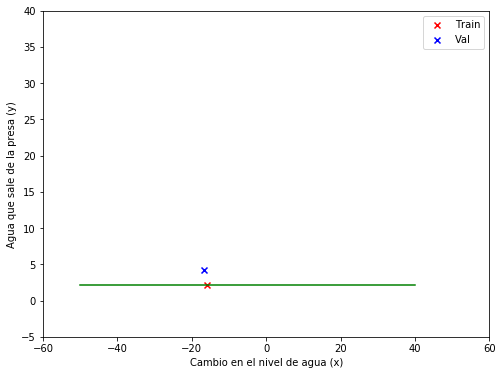

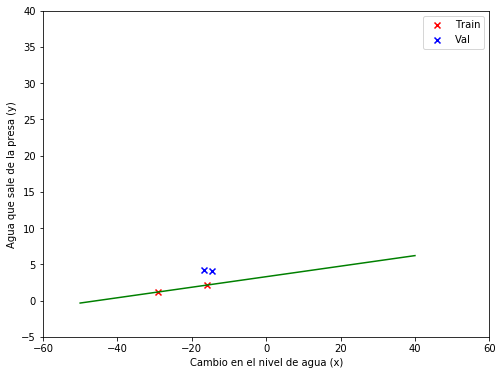

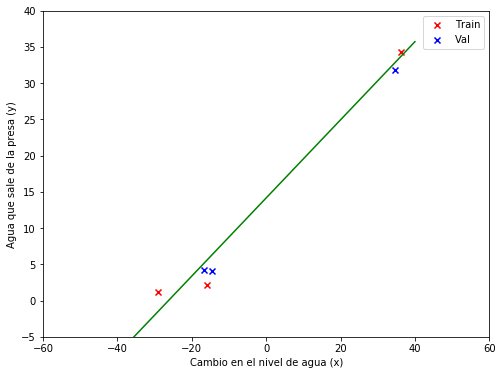

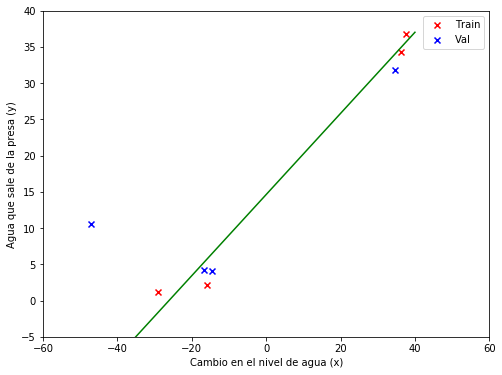

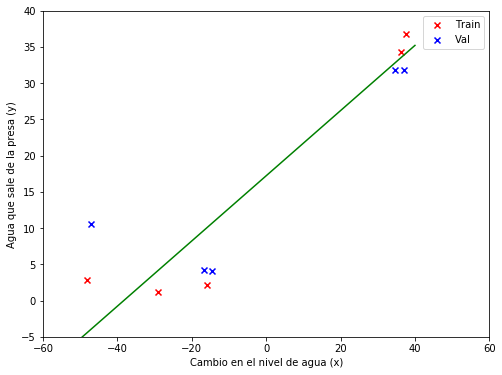

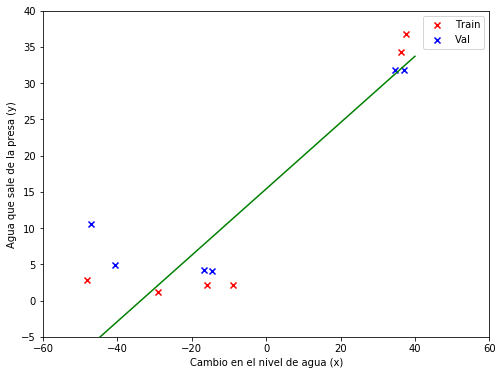

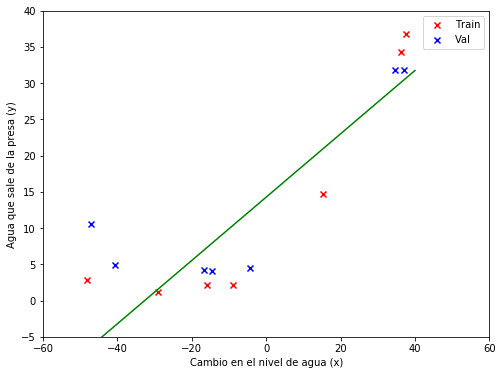

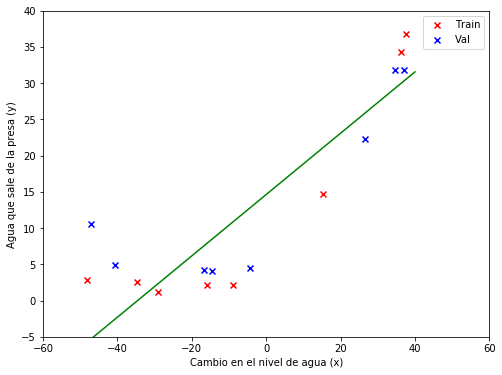

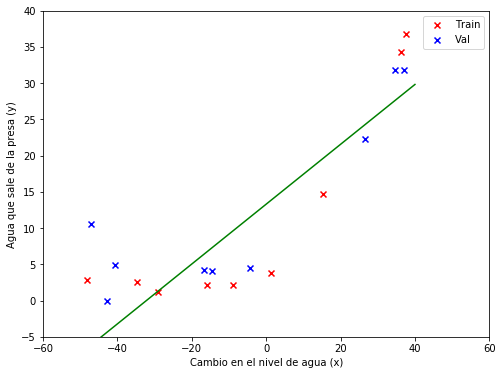

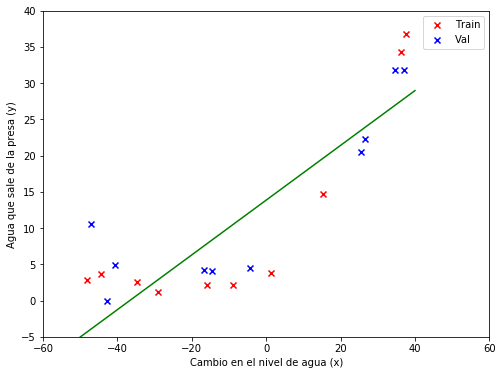

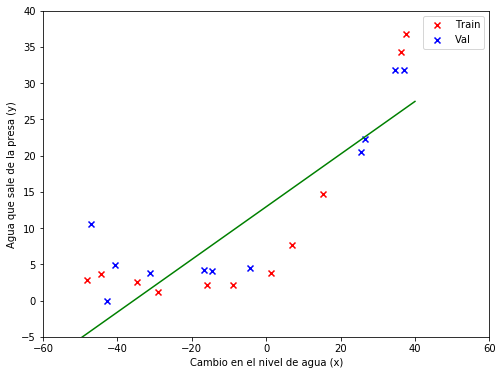

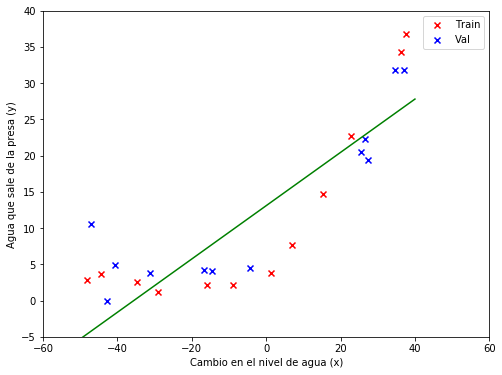

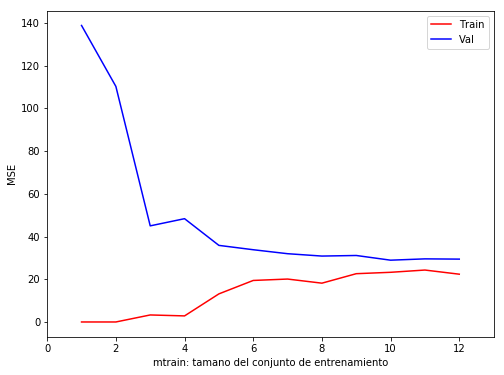

In [17]:
# Creamos el objeto de regresión lineal
regr = LinearRegression()

# Creamos dos arrays para almacenar los resultados de error en train (Etrain) y validación de tamaño mtrain x 1 (Eval)
Etrain = np.zeros((mtrain))
Eval = np.zeros((mtrain))

# Comenzamos probando a entrenar la regresión con un solo ejemplo y realizamos la misma tarea hasta mtrain
for i in range(mtrain):
    # Ajustamos la regresión con los i primeros ejemplos (filas)
    regr.fit(Xtrain[:i+1], ytrain[:i+1]) 
    # Calculamos el error en train (SOBRE LOS i PRIMEROS EJEMPLOS) y validación
    predictionTrain = regr.predict(Xtrain[:i+1])
    predictionVal = regr.predict(Xval)
    Etrain[i] = np.mean((predictionTrain - ytrain[:i+1])**2) / 2
    Eval[i] = np.mean((predictionVal - yval)**2) / 2

    # Pintamos en cada iteración la misma figura que en el apartado anterior con la recta aprendida en cada ocasión
    plt.figure(figsize=(8, 6))

    plt.scatter(Xtrain[:i+1], ytrain[:i+1], label="Train", c='r', marker='x')
    plt.scatter(Xval[:i+1], yval[:i+1], label="Val", c='b', marker='x')

    plt.xlabel("Cambio en el nivel de agua (x)")
    plt.ylabel("Agua que sale de la presa (y)")
    plt.legend()

    xx = np.linspace(-50, 40).reshape(-1, 1)
    prediction = regr.predict(xx)
    plt.xlim(xmin=-60, xmax=60)
    plt.ylim(ymin=-5, ymax=40)
    plt.plot(xx, prediction, c='g')
    #plt.plot(Xtrain[:i+1, predictionTrain, c='g')
     

# Ahora con todos los errores en Etrain y Eval, pintamos la curva de aprendizaje
# En el eje X debemos tener el número de ejemplos utilizados para el entrenamiento (de 1 a mtrain) y en el eje y
# debe de aparecer el error obtenido. Pintamos con diferente color cada error (train/val)
plt.figure(figsize=(8, 6))
plt.xlim(xmin=0, xmax=mtrain+1)
plt.plot(np.arange(1, mtrain+1), Etrain, label="Train", c='r')
plt.plot(np.arange(1, mtrain+1), Eval, label="Val", c='b')
# Establecemos las etiquetas
plt.xlabel('mtrain: tamano del conjunto de entrenamiento')
plt.ylabel('MSE')
plt.legend()

In [18]:
Test.assertEquals(list(np.round(Etrain, 4)), [0.0, 0.0, 3.2866, 2.8427, 13.154, 19.444, 20.0985, 18.1729, 22.6094, 23.2615, 24.3172, 22.3739], 'Errores en train erróneos')
Test.assertEquals(list(np.round(Eval, 4)), [138.8468, 110.3004, 45.0102, 48.3689, 35.8652, 33.83, 31.971, 30.8624, 31.136, 28.9362, 29.5514, 29.4338], 'Errores en test erróneos')

1 test passed.
1 test passed.


## Regresión polinomial - Curva de aprendizaje
Vamos a intentar solucionar el problema que tenemos mediante la regresión polinomial, ya que parece que estamos ante un problema cuya solución no es lineal.

Para poder hacer uso de las características polinomiales utilizaremos la clase `PolynomialFeatures` de scikit junto con `StandardScaler` (para normalizar las características tras obtener las polinómicas y que el algoritmo de minimización funcione correctamente).

In [19]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Mapear Xtrain a características polinómicas y normalizar
# Primero debemos establecer el grado el polinomio que vamos a utilizar
grado = 6
# Crear el objeto de la clase PolynomialFeatures, utilizar include_bias=False ya que con scikit no lo necesitamos
# Crear también el objeto de la clase StandardScaler
poly = PolynomialFeatures(grado, include_bias=False)  # no incluimos los unos
scaler = StandardScaler()

# Utiliza fit_transform para obtener el conjunto de datos de train transformado con características polinomiales (guardar en Xtrain_poly)
Xtrain_poly = poly.fit_transform(Xtrain)
# Ahora utiliza el StandardScaler creado con fit_transform para ajustarlo y transformar los datos polinomiales (guardar en Xtrain_poly)
Xtrain_poly = scaler.fit_transform(Xtrain_poly)

# IMPORTANTE!!!!!!!!!!!!!
# DEBES HACER LO MISMO CON LOS CONJUNTOS DE VALIDACIÓN Y TEST; PERO TEN EN
# CUENTA QUE LA MEDIA Y LA DESVIACIÓN ESTÁNDAR A UTILIZAR SON LAS
# CALCULADAS EN TRAIN Y POR TANTO SOLO DEBES USAR TRANSFORM EN LUGAR DE FIT_TRANSFORM

# Mapear Xval a características polinómicas y normalizar (guardar en Xval_poly)
Xval_poly = poly.transform(Xval)
Xval_poly = scaler.transform(Xval_poly)

# Mapear Xtest a características polinómicas y normalizar (guardar en Xtest_poly)
Xtest_poly = poly.transform(Xtest)
Xtest_poly = scaler.transform(Xtest_poly)


Una vez obtenidas las nuevas características, lleva a cabo la regresión polinomial con la misma función utilizada anteriormente y dibuja el resultado además de mostrar los errores para train/val.

Error en train: 0.198052943127637
Error en val: 22.119419618903738


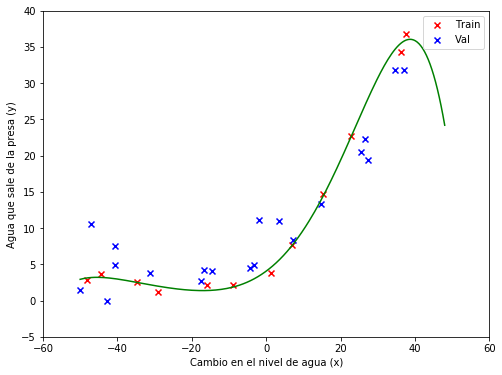

In [21]:
# Crear objeto LinearRegression y entrenarlo con los datos de train polinomiales
LinReg = LinearRegression()
LinReg.fit(Xtrain_poly, ytrain)

# Dibujar los datos y la regresión obtenida
plt.figure(figsize=(8, 6))

plt.scatter(Xtrain, ytrain, label="Train", c='r', marker='x')
plt.scatter(Xval, yval, label="Val", c='b', marker='x')

plt.xlabel("Cambio en el nivel de agua (x)")
plt.ylabel("Agua que sale de la presa (y)")
plt.legend()


# Para poder pintar la gráfica, los datos obtenidos con np.linspace 
# deben transformarse para obtener los datos polinomiales y normalizados
xx = np.linspace(-50,48,num=200).reshape(-1, 1)

# Transformar a xx_poly antes de usar predict
xx_poly = poly.fit_transform(xx)
xx_poly = scaler.transform(xx_poly)
prediction = LinReg.predict(xx_poly)

# Pintar la gráfica
plt.xlim(xmin=-60, xmax=60)
plt.ylim(ymin=-5, ymax=40)
plt.plot(xx, prediction, c='g')

# Obtenemos el error para train y validación con la regresión obtenida
# Imprimir errores en train / val (Etrain y Eval)
### BEGIN SOLUTIOn
Etrain = 0.5 * np.mean( (LinReg.predict(Xtrain_poly) - ytrain)**2 )
Eval = 0.5 *np.mean( (LinReg.predict(Xval_poly) - yval)**2 )

print('Error en train: {}'.format(Etrain))
print('Error en val: {}'.format(Eval))

In [22]:
Test.assertEquals(round(Etrain, 4), 0.1981, 'Error en train erróneo')
Test.assertEquals(round(Eval, 4), 22.1194, 'Error en test erróneo')

1 test passed.
1 test passed.


## Curva de aprendizaje para la regresión polinomial
Debes realizar el mismo ejercicio que para la regresión lineal, pero esta vez haciendo uso de las nuevas características polinómicas, ¿Qué ocurre ahora?

In [26]:
# Creamos objeto LinearRegression
LinReg = LinearRegression()

# Creamos dos arrays para almacenar los resultados de error en train y validación de tamaño mtrain x 1 (Etrain y Eval)
Etrain = np.zeros((mtrain))
Eval = np.zeros((mtrain))

# Para poder pintar la recta, creamos datos con np.linspace  y debemos
# transformarlos para obtener los datos polinomiales y normalizados
# Lo hacemos antes de entrar al bucle ya que lo reutilizaremos
# Crear xx y el correspondiente xx_poly
xx = np.linspace(-50,48,num=200).reshape(-1, 1)
xx_poly = poly.fit_transform(xx)
xx_poly = scaler.transform(xx_poly)

# Comenzamos probando a entrenar la regresión con un solo ejemplo y realizamos la misma tarea hasta mtrain
for i in range(mtrain):
    # Ajustamos la regresión con los i primeros ejemplos (filas)
    LinReg.fit(Xtrain_poly[:i+1], ytrain[:i+1]) 

    # Calculamos el error en train (SOBRE LOS i PRIMEROS EJEMPLOS) y validación
    predictionTrain = LinReg.predict(Xtrain_poly[:i+1])
    predictionVal = LinReg.predict(Xval_poly)
    Etrain[i] = np.mean((predictionTrain - ytrain[:i+1])**2) / 2
    Eval[i] = np.mean((predictionVal - yval)**2) / 2
    
    # Pintamos en cada iteración la misma figura que en el apartado anterior con la recta aprendida en cada ocasión
    plt.figure(figsize=(8, 6))

    plt.scatter(Xtrain[:i+1], ytrain[:i+1], label="Train", c='r', marker='x')
    plt.scatter(Xval[:i+1], yval[:i+1], label="Val", c='b', marker='x')

    plt.xlabel("Cambio en el nivel de agua (x)")
    plt.ylabel("Agua que sale de la presa (y)")
    plt.legend()

    prediction = LinReg.predict(xx_poly)
    plt.xlim(xmin=-60, xmax=60)
    plt.ylim(ymin=-5, ymax=40)
    plt.plot(xx, prediction, c='g')

# Ahora con todos los errores en Etrain y Eval, pintamos la curva de aprendizaje
# En el eje X debemos tener el número de ejemplos utilizados para el entrenamiento (de 1 a mtrain) y en el eje y
# debe de aparecer el error obtenido. Pintamos con diferente color cada error (train/val)

plt.figure(figsize=(8, 6))
plt.xlim(xmin=0, xmax=mtrain+1)
plt.plot(np.arange(1, mtrain+1), Etrain, label="Train", c='r')
plt.plot(np.arange(1, mtrain+1), Eval, label="Val", c='b')

# Establecemos las etiquetas
plt.xlabel('mtrain: tamano del conjunto de entrenamiento')
plt.ylabel('MSE')
plt.legend()

ValueError: operands could not be broadcast together with shapes (21,1) (11,1) 

In [ ]:
Test.assertEquals(list(np.round(Etrain, 4)), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0759, 0.1837, 0.2249, 0.2047, 0.1981], 'Errores en train erróneos')
Test.assertEquals(list(np.round(Eval, 4)), [138.8468, 143.3814, 7.6642, 5.9997, 6.3575, 9.9761, 17.8565, 6.413, 7.9338, 13.5543, 14.0629, 22.1194], 'Errores en test erróneos')

## Seleccionando el valor de lambda usando el conjunto de validación
Vamos a utilizar ahora el conjunto de validación para establecer el mejor valor de lambda, cuya capacidad de generalización evaluaremos posteriormente en el conjunto de test.

En este apartado debes:
1. Mostrar el resultado obtenido gráficamente (la mejor regresión obtenida)
2. Mostrar los errores para cada conjunto (train/val/test) para cada valor de lambda, tanto gráficamente como por pantalla utilizando la librería panda

Para ello debes realizar un bucle en el que entrenes la regresión lineal con regularización con diferentes valores de lambda ($\lambda$). Debes hacer uso de la clase Ridge de scikit-learn, que es la regresión lineal con regularización y cuyo parámetro `alpha` es el parámetro lambda ($\lambda$) de regularización.

En cada iteración del bucle, crearemos la regresión lineal  con el valor de $\lambda$ correspondiente y la ajustaremos al conjunto de entrenamiento. Posteriormente, debemos obtener los errores para train/val/test. **Siempre mantendremos como mejor regresión aquella que nos ha dado el menor error de validación.**

In [27]:
# Importamos Ridge que es la regresión lineal con regularización
from sklearn.linear_model import Ridge

# Aprende el mejor valor de lambda entre:
lambda_vec = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])

# Inicializamos los valores
bestLinReg = None
# Inicializa los arrays para los errores (Etrain, Eval y Etest)
# Inicializa también best_err y best_lambda
best_err, best_lambda = None, None  

Etrain = np.zeros((len(lambda_vec)))
Eval = np.zeros((len(lambda_vec)))
Etest = np.zeros((len(lambda_vec)))

xx = np.linspace(-50,48,num=200).reshape(-1, 1)
xx_poly = poly.fit_transform(xx)
xx_poly = scaler.transform(xx_poly)

for i in range(lambda_vec.size):
    # Obtenemos el valor de lambda a utilizar
    valorLambda = lambda_vec[i]
    # Creamos el objeto Ridge con dicho valor de lambda
    LinReg = Ridge(alpha=valorLambda)
    # Ajustamos la regresión
    LinReg.fit(Xtrain_poly, ytrain) 

    # Calculamos los errores de train/val/test
    predictionTrain = LinReg.predict(Xtrain_poly)
    predictionVal = LinReg.predict(Xval_poly)
    predictionTest = LinReg.predict(Xtest_poly)
    
    Etrain[i] = np.mean((predictionTrain - ytrain)**2) / 2
    Eval[i] = np.mean((predictionVal - yval)**2) / 2
    Etest[i] = np.mean((predictionTest - ytest)**2) / 2
    # En caso de ser el mejor modelo encontrado, guardamos el mejor error, la regresión y el valor de lambda
    # if (.... < best_err): ... Actualizar best_err, bestLinReg y best_lambda
    if not best_err or Eval[i] < best_err:
        best_err = Eval[i]
        bestLinReg = LinReg
        best_lambda = valorLambda
        
# Pintamos la figura que muestre todos los datos de train/val/test (cada uno de un color) y la mejor regresión
# obtenida.
plt.figure(figsize=(8, 6))

plt.scatter(Xtrain, ytrain, label="Train", c='r', marker='x')
plt.scatter(Xval, yval, label="Val", c='b', marker='x')
plt.scatter(Xtest, ytest, label="Test", c='g', marker='x')

prediction = bestLinReg.predict(xx_poly)
plt.plot(xx, prediction, c='orange')

plt.xlabel("Cambio en el nivel de agua (x)")
plt.ylabel("Agua que sale de la presa (y)")
plt.legend()

        
# Pintamos también una figura en la que en el eje x aparezcan los diferentes valores de lambda y en el eje y los
# diferentes errores obtenidos en cada uno de los conjuntos (mostrar cada uno con un color diferente).
plt.figure(figsize=(8, 6))
plt.plot(lambda_vec, Etrain, label="Train", c='r')
plt.plot(lambda_vec, Eval, label="Val", c='b')
plt.plot(lambda_vec, Etest, label="Test", c='g')



# Establecemos las etiquetas y la leyenda
plt.xlabel('Lambda');
plt.ylabel('MSE');
plt.legend(['train', 'val', 'test'])

# Finalmente, vamos a mostrar los datos de la última figura en forma de tabla utilizando los Pandas

# Concatenamos horizontalmente los datos a mostrar (hstack de las variable Etrain, Eval y Etest
# con su correspondiente reshape a -1, 1)
# datosPD = ...
datosPD = np.hstack((Etrain.reshape(-1, 1), Eval.reshape(-1, 1), Etest.reshape(-1, 1)))
# Creamos los nombres de las columnas, una lista con los strings Train, Validation, Test
# nombreColumnas = ...
nombreColumnas = ['Train', 'Validation', 'Test']

# Importamos la librería de pandas ya que no lo hemos hecho anteriormente
import pandas as pd
# Generamos el dataframe con data=datosPD, index=lambda_vec y columns=nombreColumnas
datosPanda = pd.DataFrame(data=datosPD, index=lambda_vec, columns=nombreColumnas)
# Establecemos el nombre de la columna index (valores de lambda)
datosPanda.index.name = 'Lambda'
# Mostramos el dataframe generado
print(datosPanda)

ValueError: Found input variables with inconsistent numbers of samples: [12, 32]

In [25]:
Test.assertEquals(list(np.round(Etrain, 4)), [0.1981, 0.199, 0.2034, 0.224, 0.2829, 0.4496, 0.8787, 1.9114, 4.4975, 15.2409], 'Errores en train erróneos')
Test.assertEquals(list(np.round(Eval, 4)), [22.1194, 19.7955, 17.2911, 13.7673, 10.4271, 7.0124, 4.7969, 3.9335, 3.5409, 10.5961], 'Errores en validación erróneos')
Test.assertEquals(list(np.round(Etest, 4)), [18.6809, 17.0871, 15.379, 13.0291, 10.8127, 7.78, 4.6841, 3.0988, 4.3976, 17.2341], 'Errores en test erróneos')

1 test passed.
1 test passed.
1 test passed.


## Particionamiento de los datos en particiones de train/val/test

Vamos a aprender a particionar los datos de manera aleatoria para las prácticas futuras.

Debes particionar los datos disponibles en tres partes. Para ello, antes debes unir los Xtrain, Xval e Xtest (lo mismo con las y's) en un único vector que contenga todos los datos. Ahora particionaremos de nuevo estos datos en las variables correspondientes. Almacénalas en las variables Xtrain, Xval, Xtest e ytrain, yval, ytest.

Ten en cuenta que debe de haber correspondencia entre los datos anteriores ($X$, $y$) y los nuevos (Xtrain, ytrain), (Xval, yval), (Xtest, ytest). Utilizaremos un 60% de los datos para train, un 20% para  validación y un 20% para test (el particionamiento no es exacto al haber 54 datos, pero debes utilizar todos igualmente).

El particionamiento debe ser ALEATORIO; por lo que puedes hacer uso de la función `np.random.permutation(N)` que devuelve la permutación de $N$ elementos de $1..N$; es decir, puedes usarlo para obtener índices nuevos para reordenar el vector $X$ y particionarlo posteriormente

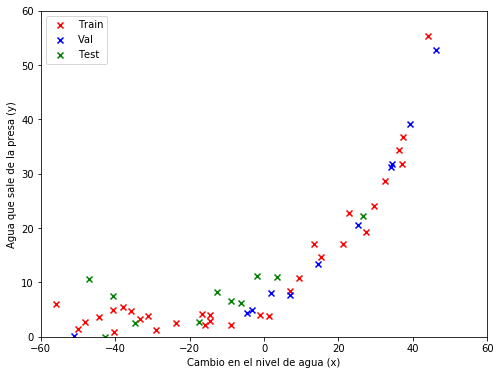

In [24]:
# Utilizamos la semilla para que obtengamos siempre las mismas particiones en este bloque
np.random.seed(123456789)

# Retomamos los valores de las particiones iniciales en caso de reejecutar la celda
Xtrain = train[:, :-1]
Xval = val[:, :-1]
Xtest = test[:, :-1]
ytrain = train[:, -1]
yval = val[:, -1]
ytest = test[:, -1]

# Concatenamos todos los conjuntos X en uno solo (X). Utiliza np.vstack
X = np.vstack((Xtrain, Xval, Xtest))
# Concatenamos todos los valores de las salidas y en uno solo (y), utiliza np.vstack de nuevo
y = np.vstack((ytrain.reshape(-1, 1), yval.reshape(-1, 1), ytest.reshape(-1, 1)))

# Obtenemos el número de ejemplos actuales
ejemplos = len(X)

# Utiliza np.random.permutation para obtener la localización de los ejemplos aleatoriamente
# Luego aplica estos nuevos índices a X e y para reordenarlos aleatoriamente
indices = np.random.permutation(ejemplos)
X = X[indices]
y = y[indices]

# Establece el número de ejemplos en mtrain y mval como el 60 y 20% de ejemplos en X (utiliza el redondeo y recuerda
# que el resultado debe ser un entero)
mtrain = int(round(0.6*ejemplos))
mval = int(round(0.2*ejemplos+0.5)) 

# Obtén el número de ejemplos en test (mtest) como el número de ejemplos restantes a particionar
mtest = ejemplos - mtrain - mval

# Crea los nuevos conjuntos
Xtrain = X[:mtrain, :]
ytrain = y[:mtrain, 0].reshape(-1, 1)

Xval = X[mtrain:mtrain+mval, :]
yval = y[mtrain:mtrain+mval, 0].reshape(-1, 1)

Xtest = X[mtrain+mval:, :]
ytest = y[mtrain+mval:, 0].reshape(-1, 1)

# Dibuja la nueva distribución de puntos de train, validación y test
plt.figure(figsize=(8, 6))
plt.scatter(Xtrain, ytrain, label="Train", c='r', marker='x')
plt.scatter(Xval, yval, label="Val", c='b', marker='x')
plt.scatter(Xtest, ytest, label="Test", c='g', marker='x')

plt.xlabel("Cambio en el nivel de agua (x)")
plt.ylabel("Agua que sale de la presa (y)")
plt.legend()

plt.xlim(xmin=-60, xmax=60)
plt.ylim(ymin=-5, ymax=40)

plt.axis([-60, 60, 0, 60]);
plt.legend()

In [91]:
Test.assertEquals(list(np.round(Xtrain[:5, :], 4)), [-40.6861, -29.153, -8.9415, 22.7627, -48.0588], 'Particionamiento de Xtrain erróneo')
Test.assertEquals(list(np.round(Xval[:5, :], 4)), [7.0135, 1.9745, 34.0545, -3.2639, 25.3741], 'Particionamiento de Xtrain erróneo')
Test.assertEquals(list(np.round(Xtest[:5, :], 4)), [-42.7977, 26.5336, -47.0101, -6.1326, -34.7063], 'Particionamiento de Xtrain erróneo')
Test.assertEquals(list(np.round(ytrain[:5, :], 4)), [4.9594, 1.1733, 2.1211, 22.7524, 2.809], 'Particionamiento de ytrain erróneo')
Test.assertEquals(list(np.round(yval[:5, :], 4)), [7.6277, 8.0873, 31.3236, 4.8838, 20.5038], 'Particionamiento de yval erróneo')
Test.assertEquals(list(np.round(ytest[:5, :], 4)), [-0.0, 22.2763, 10.6237, 6.1926, 2.6142], 'Particionamiento de ytest erróneo')

1 test passed.
1 test passed.
1 test passed.
1 test passed.
1 test passed.
1 test passed.


## Pipelines de Python
Python y más concretamente scikit, tiene un clase denominada Pipeline que permite concatenar una serie de procesos que queramos aplicar a los datos como transformaciones (PolynomialFeatures, StandardScaler) o un clasificador o regresor (Ridge).

De esta forma nos ahorramos el tener que aplicar el mismo proceso a los datos de train, validación y test cada vez, ya que lo realiza el automáticamente.

Primero, creamos una pipeline con las fases deseadas. Por ejemplo, para crear una pipeline que primero cree las variable polinomiales con grado 6, luego estandarice los datos y aprenda la regresión lineal con regularización (con el mejor valor de $\lambda$ encontrado anteriormente) simplemente debemos escribir la siguiente instrucción:

```python
pipe = Pipeline([('variablesPoly', PolynomialFeatures(degree=6, include_bias=False)), ('StandardScaler', StandardScaler()), ('Ridge', Ridge(alpha=best_lambda))])
```

Es decir, la pipeline recibe una lista con los procesos a realizar, en la que en cada proceso tenemos una tupla con su nombre y el constructor a aplicar.

Posteriormente, solo debemos usar fit y predict:
* **fit:** Al aplicar fit, la pipeline hará un fit_tranform para obtener las variables polinomiales y otro para estandarizar los datos. Finalmente, en el caso de la regresión aplicará el fit para entrenarla.
* **predict:** predict se aplica tras aplicar fit a la pipeline. En este caso, scikit sabe que solo debe aplicar transform para obtener las variables polinomiales y la estandarización. Finalmente, aplicará el predict del regresor para obtener el valor de los datos ya procesados.

Es decir, nos olvidamos de transformar independientemente los datos de train, validación y test.

Podemos continuar aprovechando scikit y utilizar su paquete de métricas para obtener el error cuadrático medio [(Link a metrics)](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). Ten en cuenta que en este caso nos devuelve el doble del error que calculamos nosotros porque no lo divide por 2.

Veamos el ejemplo.

In [94]:
# Se importa la librería para utilizar la clase Pipeline
from sklearn.pipeline import Pipeline

# Se crea la pipeline con las 3 fases necesarias para solventar el problema (guárdala en pipe)
pipe = Pipeline([('variablesPoly', PolynomialFeatures(degree=6, include_bias=False)), 
                 ('StandardScaler', StandardScaler()), 
                 ('Ridge', Ridge(alpha=best_lambda))])


# Se realiza el aprendizaje de todos los objetos de la pipeline. Utiliza pipe.fit(...)
pipe.fit(Xtrain, ytrain)

# Se realiza la predicción de los datos de validación y test. Utiliza salidas = pipe.predict(...)
salidasTrain = pipe.predict(Xtrain)
salidasVal = pipe.predict(Xval)
salidasTest = pipe.predict(Xtest)


# Importamos las métricas de scikit y utilizamos metrics.mean_squared_error(salidas, real) para obtener el error
from sklearn import metrics
EtrainSk = metrics.mean_squared_error(salidasTrain, ytrain)
EvalSk = metrics.mean_squared_error(salidasVal, yval)
EtestSk = metrics.mean_squared_error(salidasTest, ytest)


# Calculamos el error como lo hemos hecho hasta ahora (la mitad de la media de las diferencias entre las salidas
# y el valor real al cuadrado). Almacena los resultados en Etrain, Eval y Etest
Etrain = np.mean((salidasTrain - ytrain)**2) / 2
Eval = np.mean((salidasVal - yval)**2) / 2
Etest = np.mean((salidasTest - ytest)**2) / 2


# Imprimimos ambos resultados
print('Error en train con scikit metrics: {}, Error en train manual: {}'.format(EtrainSk, Etrain))
print('Error en val con scikit metrics: {}, Error en val manual: {}'.format(EvalSk, Eval))
print('Error en test con scikit metrics: {}, Error en test manual: {}'.format(EtestSk, Etest))

Error en train con scikit metrics: 5.721202482284987, Error en train manual: 2.8606012411424935
Error en val con scikit metrics: 3.4428094327177523, Error en val manual: 1.7214047163588762
Error en test con scikit metrics: 11.093018268708558, Error en test manual: 5.546509134354279


In [95]:
# Comprobamos que son iguales pero que nuestra medida de error es la mitad de lo que nos devuelve scikit
Test.assertEquals(Etrain == EtrainSk * 0.5, True, 'Errores en train erróneo')
Test.assertEquals(Eval == EvalSk * 0.5, True, 'Errores en val erróneo')
Test.assertEquals(Etest == EtestSk * 0.5, True, 'Errores en test erróneo')

1 test passed.
1 test passed.
1 test passed.
